In [1]:
# PROBLEM STATEMENT
# Consider only the below columns and prepare a prediction model for predicting Price.
# Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [4]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
# using columns which are mentioned
data1=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
data1.shape

(1436, 9)

In [7]:
data1.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [9]:
data1[data1.duplicated()]  

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
data2=data1.drop_duplicates()  # dropping dupliactes
data2[data2.duplicated()] # no duplicates

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [11]:
data2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## visualization

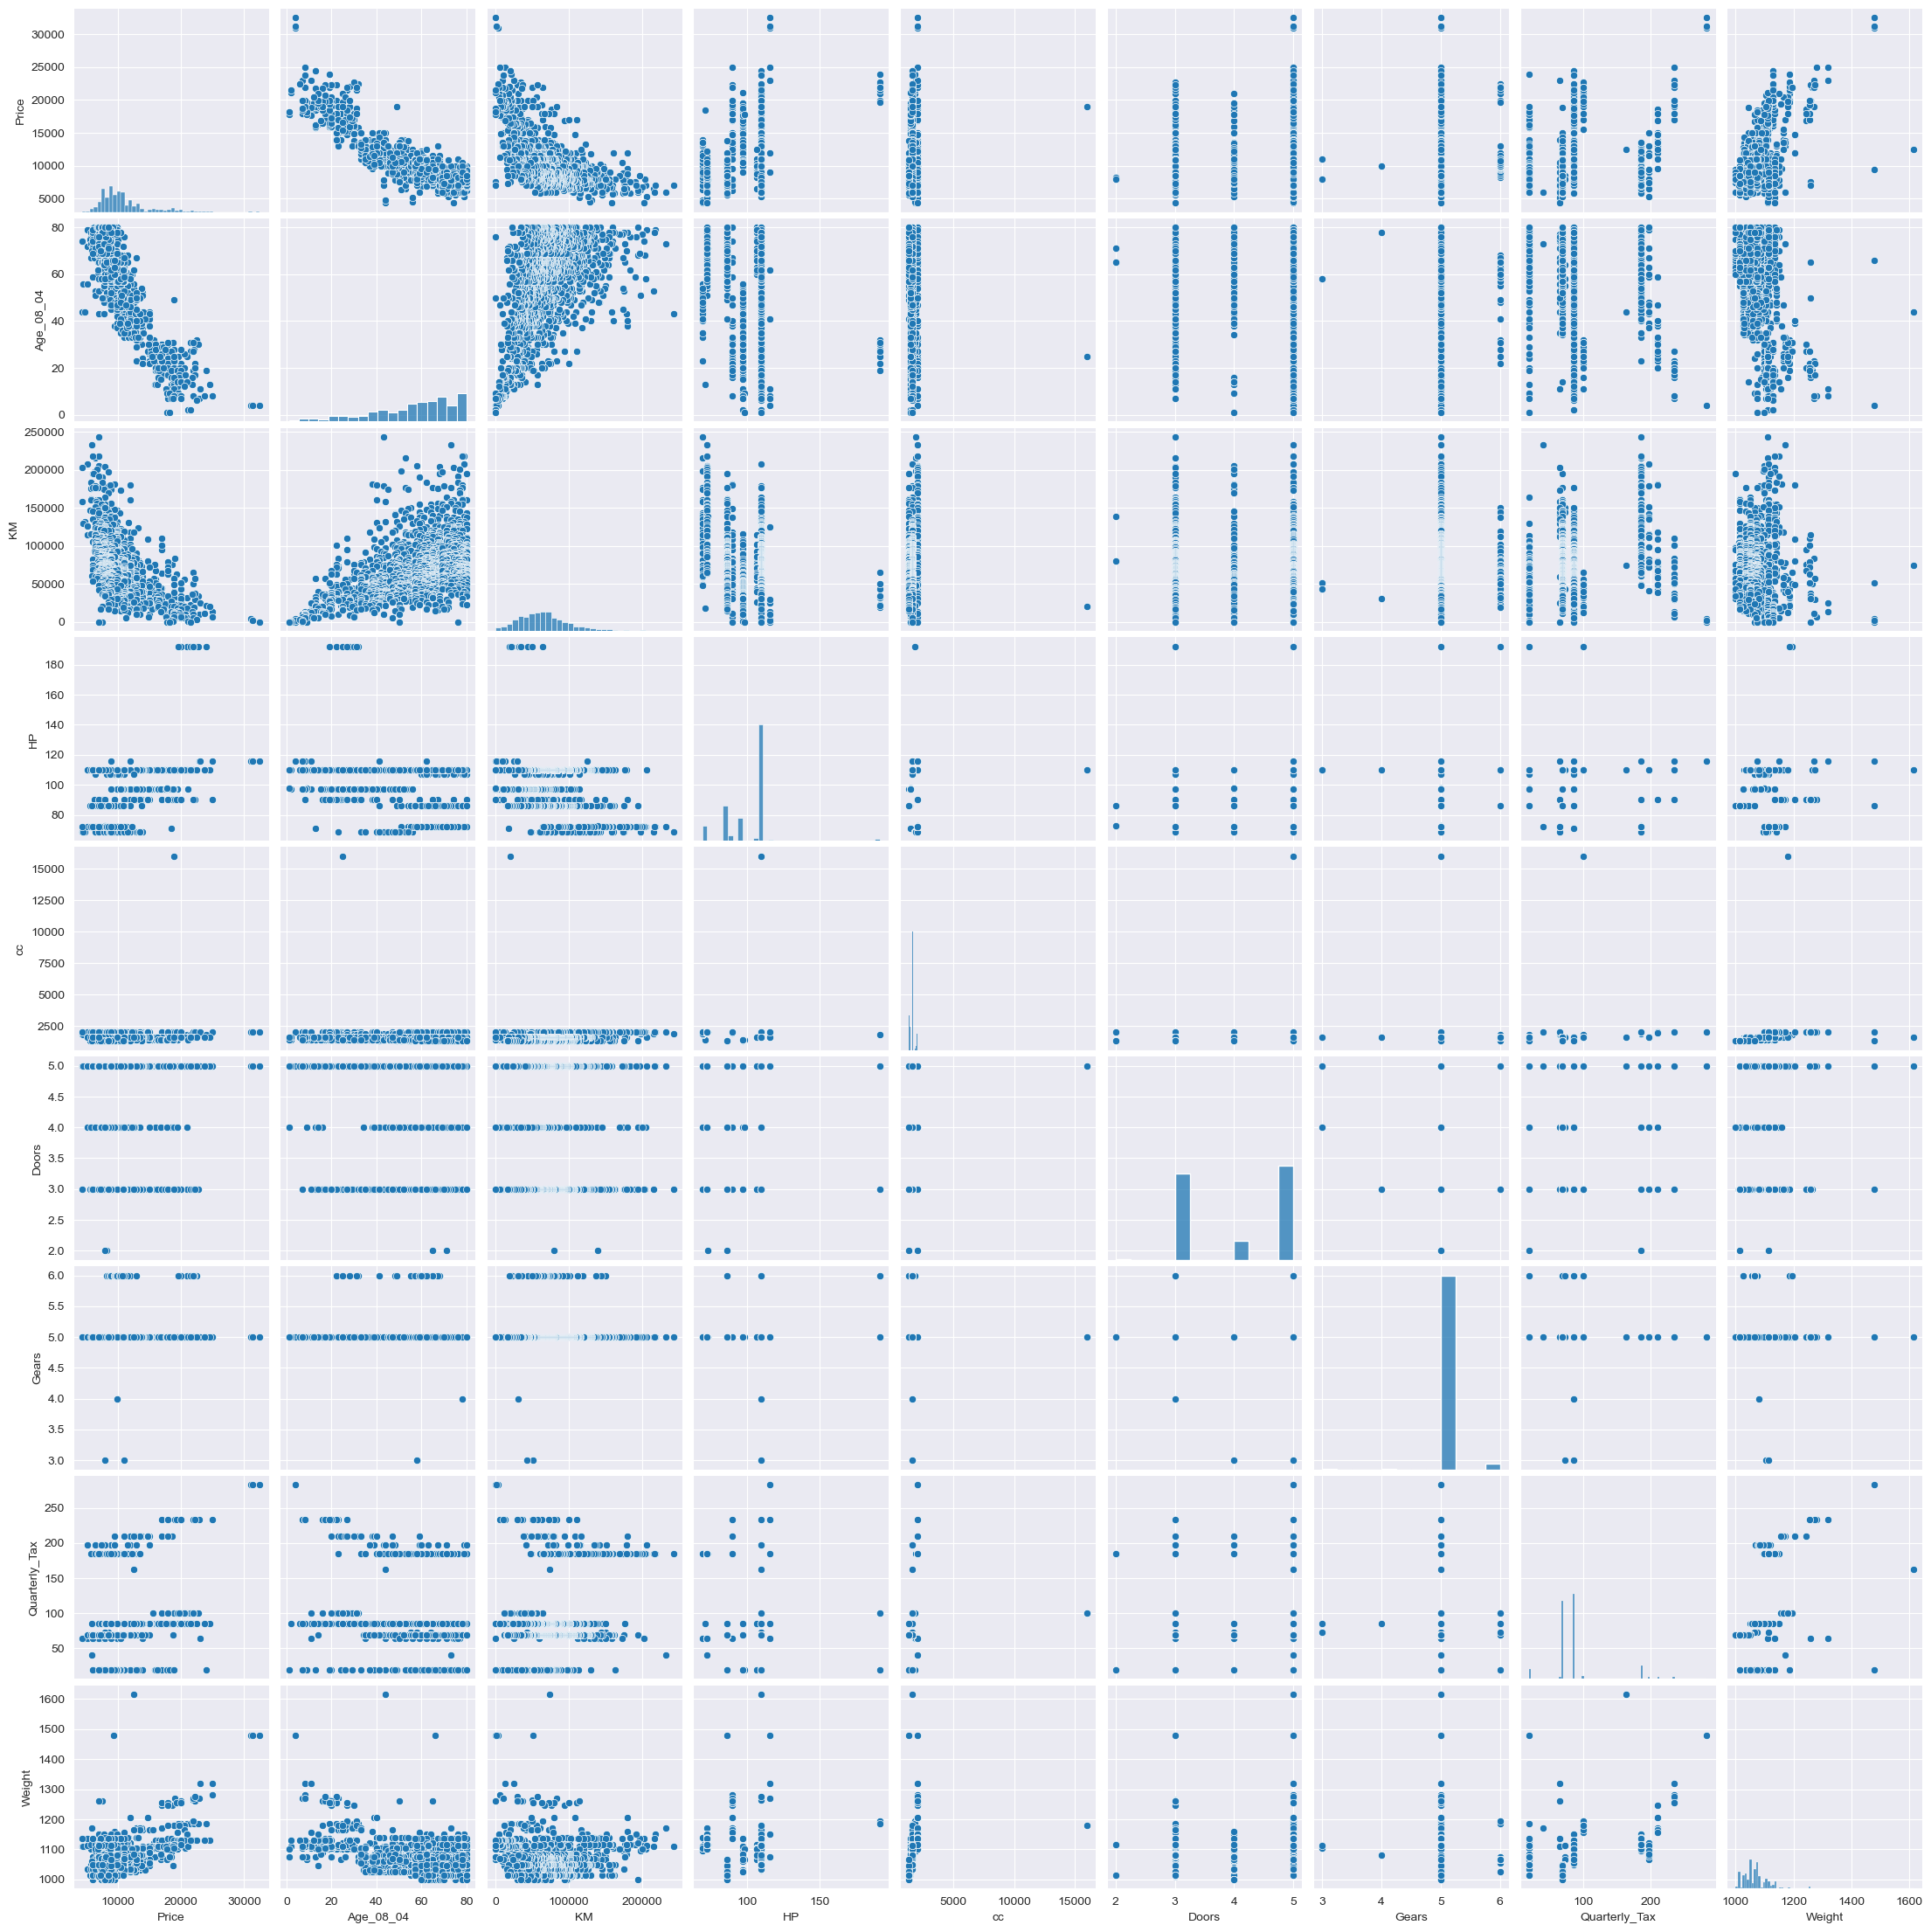

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(data2)
plt.show()

## Building Model

In [35]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit()

In [36]:
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [37]:
model.tvalues

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64

In [38]:
model.pvalues
# cc and doors have p values greater than 0.05

Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64

In [24]:
model1.rsquared, model1.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

## SLR Models

In [44]:
ml_cc=smf.ols('Price~cc',data=data2).fit()
ml_cc.pvalues
# p value less than 0.05

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [45]:
ml_doors=smf.ols('Price~Doors',data=data2).fit()
ml_doors.pvalues
# p value less than 0.05

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [50]:
ml_cd=smf.ols('Price~cc+Doors',data=data2).fit()
ml_cd.pvalues
# p value less than 0.05

Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64

## VIF Calculation 

In [51]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols('HP~KM+Age_08_04+cc+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_cc=smf.ols('cc~KM+HP+Age_08_04+Doors+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_doors=smf.ols('Doors~KM+HP+cc+Age_08_04+Gears+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_doors=1/(1-rsq_doors)
rsq_gears=smf.ols('Gears~KM+HP+cc+Doors+Age_08_04+Quarterly_Tax+Weight',data=data2).fit().rsquared
vif_gears=1/(1-rsq_gears)
rsq_qt=smf.ols('Quarterly_Tax~KM+HP+cc+Doors+Gears+Age_08_04+Weight',data=data2).fit().rsquared
vif_qt=1/(1-rsq_qt)
rsq_wt=smf.ols('Weight~KM+HP+cc+Doors+Gears+Quarterly_Tax+Age_08_04',data=data2).fit().rsquared
vif_wt=1/(1-rsq_wt)

In [52]:
d1={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly Tax,2.295375
7,Weight,2.487180


In [53]:
# VIF value indicates there is no multicollinearity
# There is no correlation between multiple independent variables in model.

## Residual Analysis

In [54]:
# assumption1 : residuals are independent and no visible pattern exists

eval_env: 1


<Figure size 1000x500 with 0 Axes>

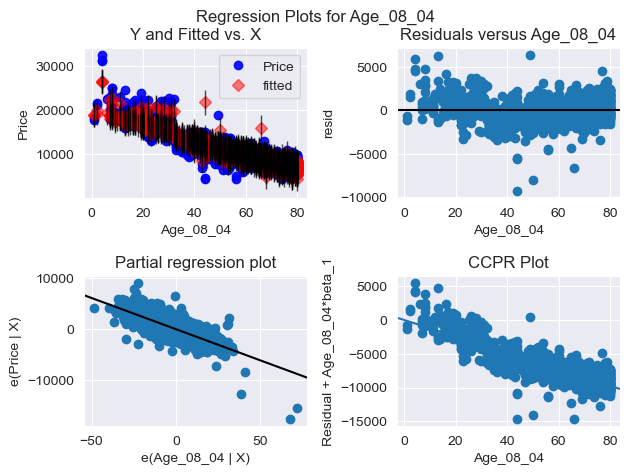

In [59]:
# residual plot
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04')
plt.show()
# no pattern in residual plot, model is good fit 

eval_env: 1


<Figure size 1000x500 with 0 Axes>

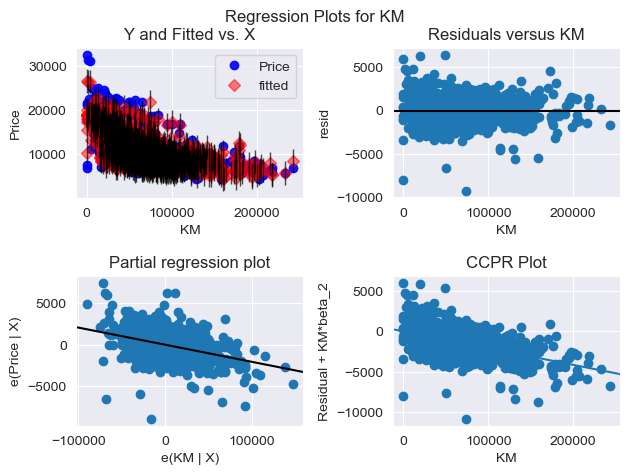

In [60]:
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'KM')
plt.show()

eval_env: 1


<Figure size 1000x500 with 0 Axes>

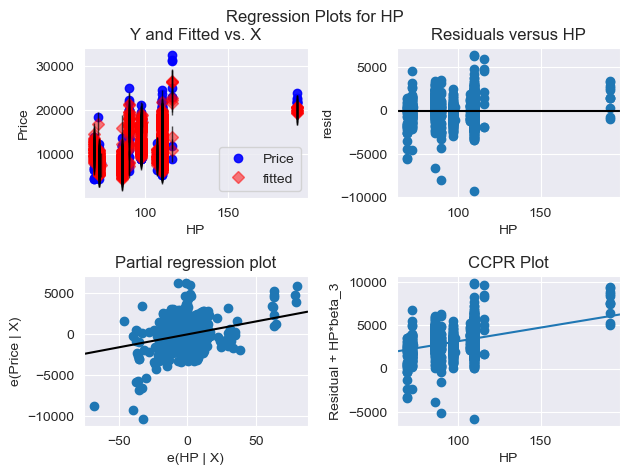

In [61]:
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'HP')
plt.show()

eval_env: 1


<Figure size 1000x500 with 0 Axes>

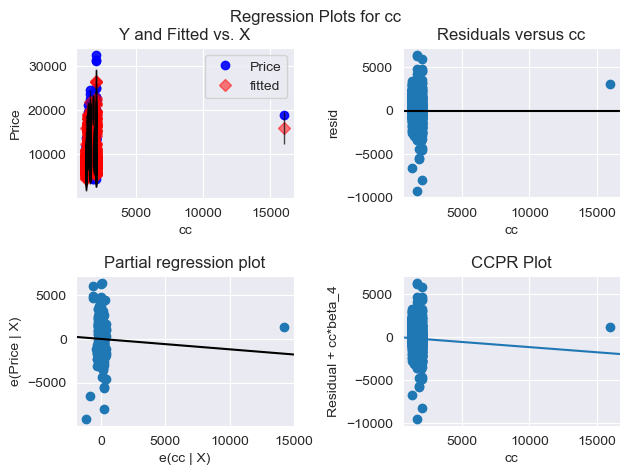

In [62]:
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'cc')
plt.show()

eval_env: 1


<Figure size 1000x500 with 0 Axes>

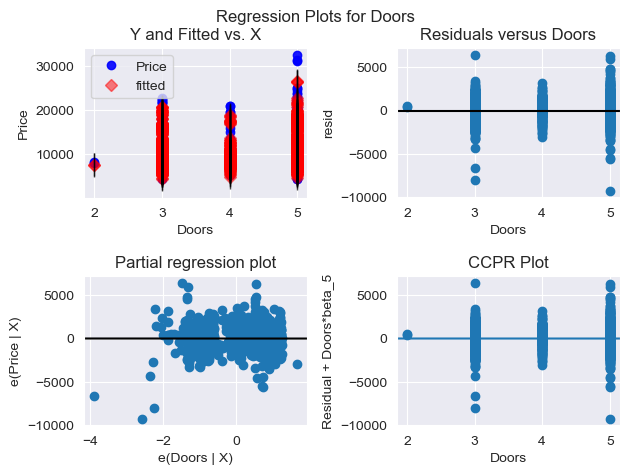

In [63]:
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'Doors')
plt.show()

eval_env: 1


<Figure size 1000x500 with 0 Axes>

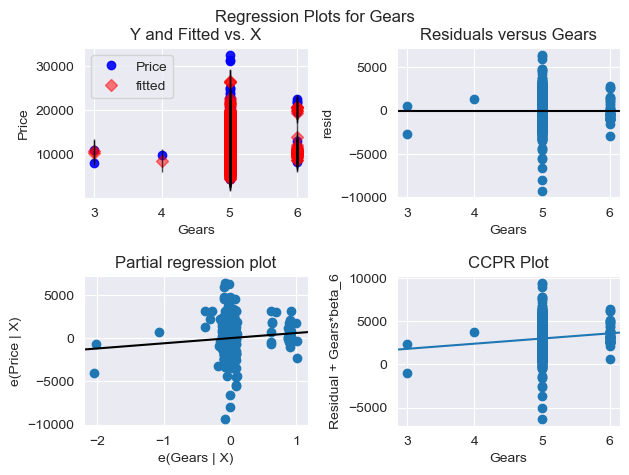

In [64]:
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'Gears')
plt.show()

eval_env: 1


<Figure size 1000x500 with 0 Axes>

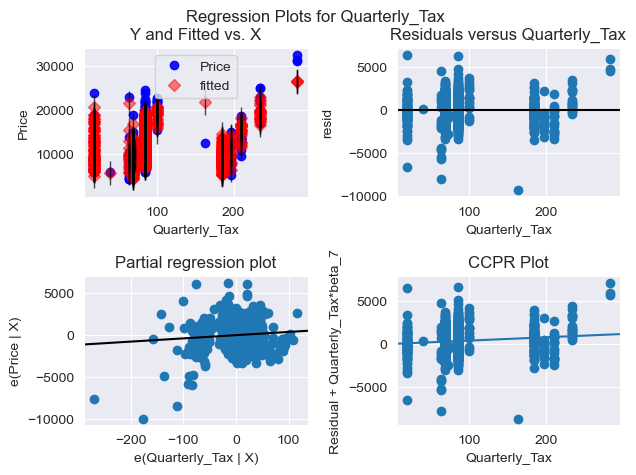

In [65]:
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax')
plt.show()

eval_env: 1


<Figure size 1000x500 with 0 Axes>

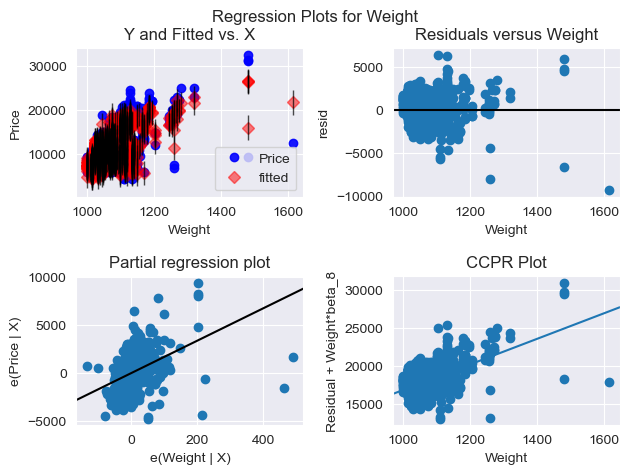

In [66]:
fig = plt.figure(figsize=(10,5))
fig=sm.graphics.plot_regress_exog(model,'Weight')
plt.show()

## Test for normality of residuals

In [67]:
# assumption2: residuals are normally distributed

<Figure size 640x480 with 0 Axes>

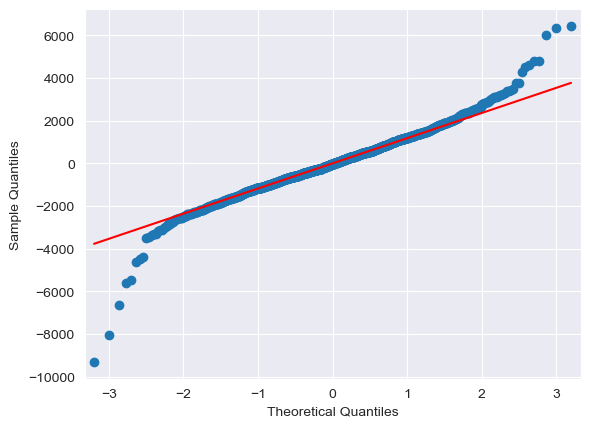

In [70]:
qq=plt.figure()
qq=sm.qqplot(model.resid,line='q') 
plt.show()

## Homoscedasticity

In [71]:
# assumption3: constant variance

In [72]:
def get_standardized_values(x):
    return (x-x.mean())/x.std()

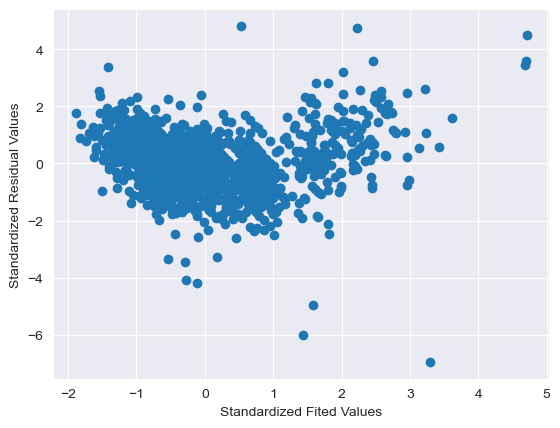

In [73]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.xlabel('Standardized Fited Values')
plt.ylabel('Standardized Residual Values')
plt.show()

## Model Deletion Diagnostics ( checking outliers and influencers)

In [74]:
influence=model.get_influence()
cooks=influence.cooks_distance

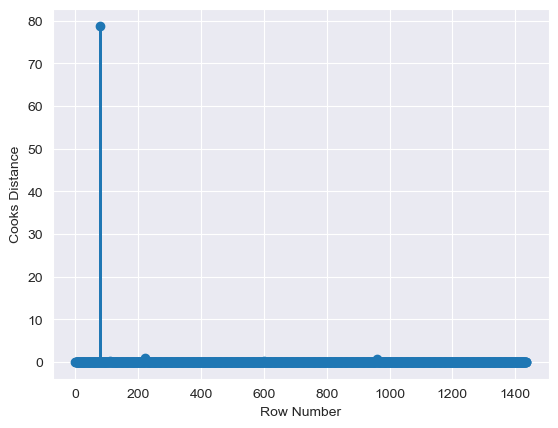

In [75]:
plt.scatter(data2.index,cooks[0])
plt.plot(data2.index,cooks[0])
plt.xlabel('Row Number')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:
mean_cooks=np.mean(cooks[0])
influence_points=data2.index[cooks[0]>(4*mean_cooks)]
influence_points

Int64Index([80, 221, 960], dtype='int64')

In [77]:
data2.iloc[influence_points,:] 
# 80, 222 and 961 indices are influence points

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
222,11950,40,73042,110,1598,5,5,85,1075
961,8750,59,50469,110,1600,5,5,85,1070


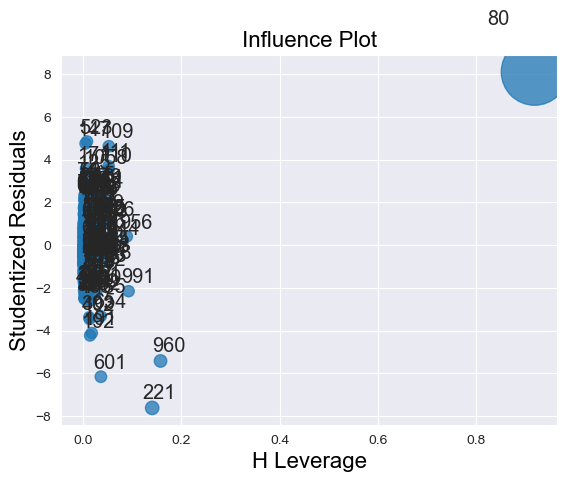

In [78]:
influence_plot(model)
plt.show()
# plotting influence point to recheck influencers

In [79]:
# Improving Model

In [80]:
# discarding data point 80 and reassigning row number

In [91]:
data_new=data2.drop(data2.index[[80,222,961]],axis=0).reset_index()
data_new.tail()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1427,1431,7500,69,20544,86,1300,3,5,69,1025
1428,1432,10845,72,19000,86,1300,3,5,69,1015
1429,1433,8500,71,17016,86,1300,3,5,69,1015
1430,1434,7250,70,16916,86,1300,3,5,69,1015
1431,1435,6950,76,1,110,1600,5,5,19,1114


In [92]:
data_new1=data_new.drop(['index'],axis=1)
data_new1.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015
1431,6950,76,1,110,1600,5,5,19,1114


In [93]:
final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new1).fit()
final_model.params

Intercept       -6298.131769
Age_08_04        -120.416810
KM                 -0.017830
HP                 38.951152
cc                 -2.486088
Doors             -25.851747
Gears             531.129513
Quarterly_Tax       8.710316
Weight             20.143070
dtype: float64

In [98]:
final_model.tvalues, final_model.pvalues

(Intercept        -4.544584
 Age_08_04       -47.002474
 KM              -13.953406
 HP               13.339641
 cc               -8.078033
 Doors            -0.658707
 Gears             2.754276
 Quarterly_Tax     6.058927
 Weight           17.986589
 dtype: float64,
 Intercept         5.970595e-06
 Age_08_04        7.494990e-292
 KM                1.437698e-41
 HP                2.461350e-38
 cc                1.390962e-15
 Doors             5.101907e-01
 Gears             5.957111e-03
 Quarterly_Tax     1.751395e-09
 Weight            2.450906e-65
 dtype: float64)

In [94]:
final_model.rsquared, final_model.rsquared_adj
# slight improvement in model

(0.8681935976802916, 0.8674525919047767)

## Prediction for new data

In [102]:
new_df=pd.DataFrame({'Age_08_04':12,'KM':40000,'HP':80,'cc':1300,'Doors':4,'Gears':5,'Quarterly_Tax':69,'Weight':1012},index=[1])

In [103]:
final_model.predict(new_df)   

1    14965.890807
dtype: float64

In [107]:
pred=final_model.predict(data_new1)
pred.head()

0    16501.892918
1    16039.191299
2    16475.528400
3    16122.563052
4    15910.994436
dtype: float64

In [108]:
df=pd.concat([data_new1['Price'],pred],axis=1)
df.head(20)
# dataframe of actual and predicted values for comparison

,Price,0
0,13500,16501.892918
1,13750,16039.191299
2,13950,16475.528400
3,14950,16122.563052
4,13750,15910.994436
5,12950,15268.989901
6,16900,16782.508309
7,18600,16755.085571
8,21500,20421.691729
9,12950,14075.559649


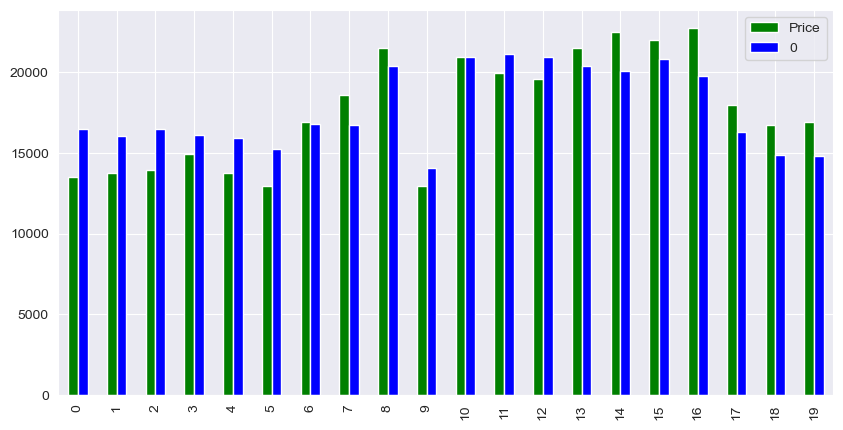

In [109]:
# bar plot between actual and predicted values
dff=df.head(20)
dff.plot(kind='bar',figsize=(10,5),color=['green','blue'])
plt.show()